In [89]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path

#### Merge the 12 months of sales data into a single CSV file

In [69]:
current_path = Path.cwd()
sales_data = current_path / 'Sales_Data'
datas = os.listdir(sales_data)

all_months_data = pd.DataFrame()

for file in datas:
    link = Path(sales_data) / file
    df = pd.read_csv(link)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

## Data Cleaning and Preprocessing with Pandas

In this section, we will load a CSV file into a DataFrame, handle missing values, and remove rows where any column name appears as a value in the DataFrame.

In [70]:
all_data = pd.read_csv('all_data.csv')
all_data.dropna(inplace=True)

column_names = all_data.columns
column_names = column_names.tolist()
mask = all_data.apply(lambda row: row.astype(str).isin(column_names).any(), axis = 1)
all_data = all_data[~mask]

## Extracting Time and Date from Order Date

In this section, we will extract the `Time` and `Date` from the `Order Date` column and add them as separate columns in the DataFrame.

In [71]:
Time = []
Date = []

for item in all_data['Order Date']:
    date = item.split(' ')[0]
    time = item.split(' ')[1]
    Date.append(date)
    Time.append(time)
    
all_data['Time'] = Time
all_data['Date'] = Date

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46,04/19/19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30,04/07/19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,04/12/19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,04/12/19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27,04/30/19


## Extracting City and State from Purchase Address

In this section, we will extract the `City` and `State` from the `Purchase Address` column and add them as a new column (`City`) in the `all_data` DataFrame.


In [72]:
def city(address):
    parts = address.split(", ")
    return parts[1] if len(parts) > 1 else ''  

def state(address):
    parts = address.split(", ")
    return parts[2].split(' ')[0] if len(parts) > 2 else ''  


all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{city(str(x))} ({state(str(x))})")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46,04/19/19,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30,04/07/19,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,04/12/19,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,04/12/19,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27,04/30/19,Los Angeles (CA)


#### Q1. What is best month for sales? How much was earned that month?

ADD MONTH COLUMN

In [73]:
all_data['Date'] = pd.to_datetime(all_data['Date'], format='%m/%d/%y', errors= 'coerce')
all_data['Month'] = all_data['Date'].dt.month
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date,City,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46,2019-04-19,Dallas (TX),4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30,2019-04-07,Boston (MA),4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,2019-04-12,Los Angeles (CA),4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,2019-04-12,Los Angeles (CA),4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27,2019-04-30,Los Angeles (CA),4


Adding `Sales` column by multiplying `Quantity Ordered` to `Price Each`.

In [74]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date,City,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46,2019-04-19,Dallas (TX),4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30,2019-04-07,Boston (MA),4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,2019-04-12,Los Angeles (CA),4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,2019-04-12,Los Angeles (CA),4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27,2019-04-30,Los Angeles (CA),4,11.99


In [75]:
Q1 = all_data[['Month','Sales']]
Q1 = Q1.groupby(['Month']).sum()

## Bar Chart of Sales Per Month

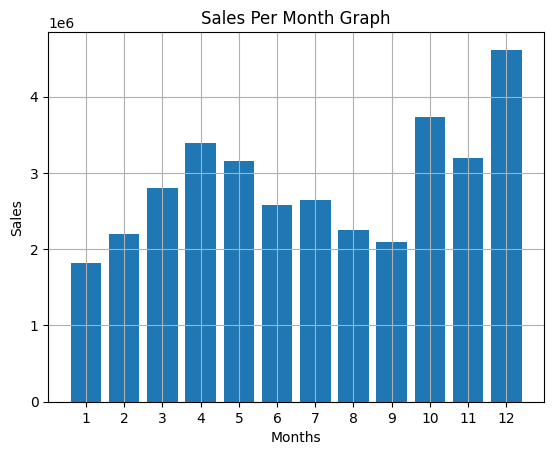

In [76]:
month = range(1,13)
plt.bar(month, Q1["Sales"])
plt.xticks(month)
plt.grid()
plt.xlabel("Months")
plt.ylabel('Sales')
plt.title('Sales Per Month Graph')
plt.show()

As we can see from the graph above, the best month for sales is December, with 4.6 million sales.

#### Q2. Which City sold the most product

Aggregating Sales Data by City

In [77]:
Q2 = all_data[["City", "Sales"]]
Q2 = Q2.groupby(['City']).sum().reset_index()
Q2


,City,Sales
0,Atlanta (GA),2795498.58
1,Austin (TX),1819581.75
2,Boston (MA),3661642.01
3,Dallas (TX),2767975.40
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
6,Portland (ME),449758.27
7,Portland (OR),1870732.34
8,San Francisco (CA),8262203.91
9,Seattle (WA),2747755.48


## Bar Chart of Sales per City

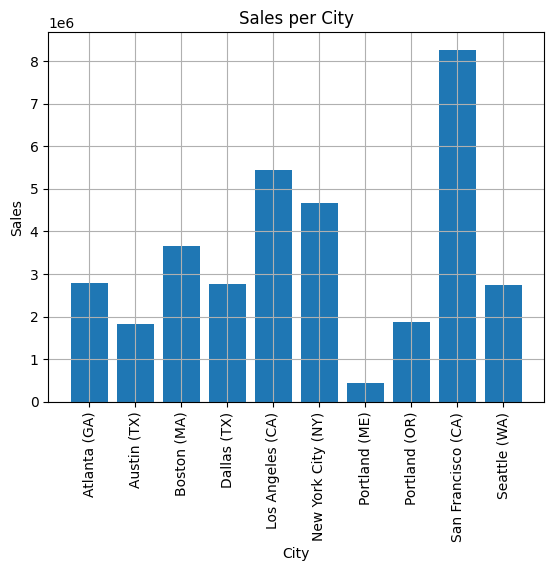

In [78]:
plt.bar(Q2["City"], Q2["Sales"])
plt.grid()
plt.xticks(rotation = 'vertical')
plt.title("")
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Sales per City")
plt.show()

San Francisco (CA) have the most sales out of the cities

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

#### Add Time Column

In [79]:
all_data['Time'] = pd.to_datetime(all_data['Time'], format='%H:%M', errors='coerce')
all_data['Hour'] = all_data['Time'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date,City,Month,Sales,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",1900-01-01 08:46:00,2019-04-19,Dallas (TX),4,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1900-01-01 22:30:00,2019-04-07,Boston (MA),4,99.99,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1900-01-01 14:38:00,2019-04-12,Los Angeles (CA),4,600.00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1900-01-01 14:38:00,2019-04-12,Los Angeles (CA),4,11.99,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1900-01-01 09:27:00,2019-04-30,Los Angeles (CA),4,11.99,9


In [80]:
Q3 = all_data[["Hour", "Order ID"]]
Q3 = Q3.groupby("Hour").count().reset_index()

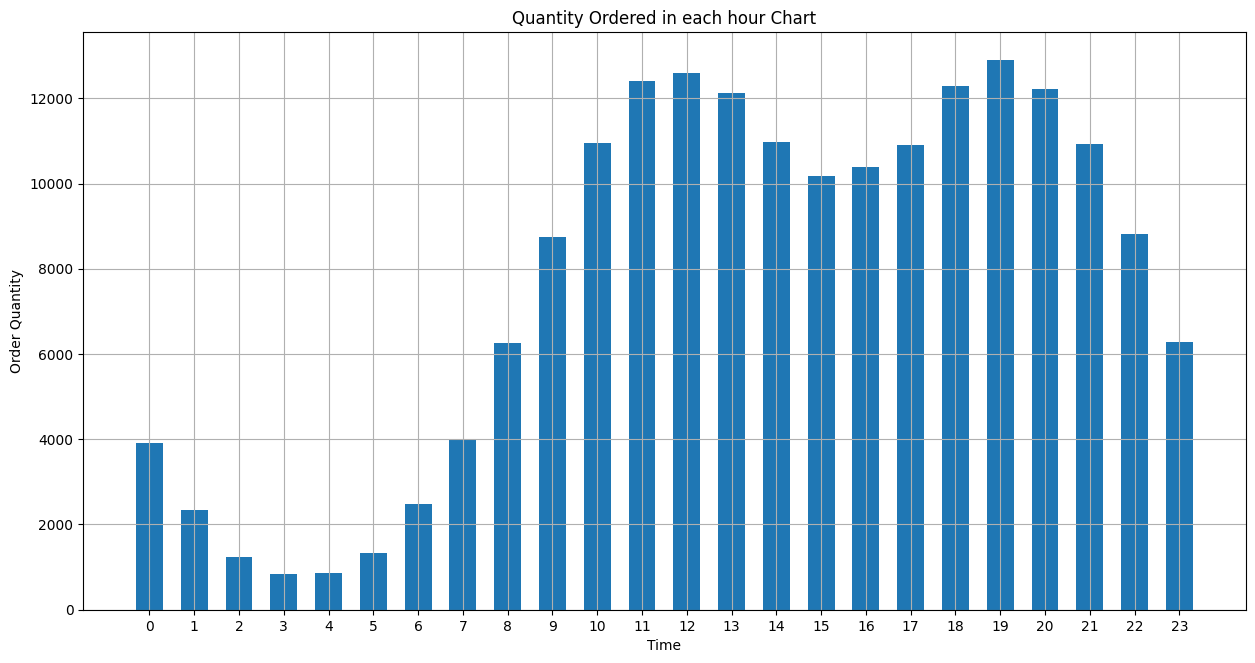

In [81]:
plt.figure(figsize=(15, 7.5))
plt.bar(Q3["Hour"], Q3['Order ID'],width=0.6)
plt.grid()
plt.xticks(Q3["Hour"])
plt.xlabel('Time')
plt.ylabel('Order Quantity')
plt.title('Quantity Ordered in each hour Chart')
plt.show()

The data shows that the peak hours for sales are between 11 AM and 9 PM. To maximize the likelihood of customers buying the product, advertisements should be displayed during these peak hours.

#### Question 4: What products are most often sold together?

In [82]:
Q4 = all_data.loc[:, ["Order ID", "Product", "Quantity Ordered"]]
Q4["Whole Order"] = Q4.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
Q4

,Order ID,Product,Quantity Ordered,Whole Order
0,176558,USB-C Charging Cable,2,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,Bose SoundSport Headphones
3,176560,Google Phone,1,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,"Google Phone, Wired Headphones"
5,176561,Wired Headphones,1,Wired Headphones
...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,AAA Batteries (4-pack)
186846,259354,iPhone,1,iPhone
186847,259355,iPhone,1,iPhone
186848,259356,34in Ultrawide Monitor,1,34in Ultrawide Monitor


In [83]:
Q4 = Q4.drop_duplicates(subset="Order ID")
Q4 = Q4.loc[:,["Order ID", "Whole Order"]]
Q4

,Order ID,Whole Order
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone, Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable
...,...,...
186845,259353,AAA Batteries (4-pack)
186846,259354,iPhone
186847,259355,iPhone
186848,259356,34in Ultrawide Monitor


In [84]:
from itertools import combinations

itema = {}

for row in Q4["Whole Order"]:
    row_item = row.split(", ")
    for comb in list(combinations(row_item, 2)):
        if comb in itema:
                itema[comb] += 1
        else:
                itema[comb] = 1

sorted_dict = dict(sorted(itema.items(), key=lambda item: item[1], reverse=True))
sorted_dict

{('iPhone', 'Lightning Charging Cable'): 1005,
 ('Google Phone', 'USB-C Charging Cable'): 987,
 ('iPhone', 'Wired Headphones'): 447,
 ('Google Phone', 'Wired Headphones'): 414,
 ('Vareebadd Phone', 'USB-C Charging Cable'): 361,
 ('iPhone', 'Apple Airpods Headphones'): 360,
 ('Google Phone', 'Bose SoundSport Headphones'): 220,
 ('USB-C Charging Cable', 'Wired Headphones'): 160,
 ('Vareebadd Phone', 'Wired Headphones'): 143,
 ('Lightning Charging Cable', 'Wired Headphones'): 92,
 ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81,
 ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80,
 ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77,
 ('Apple Airpods Headphones', 'Wired Headphones'): 69,
 ('Lightning Charging Cable', 'USB-C Charging Cable'): 58,
 ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55,
 ('Lightning Charging Cable', 'Lightning Charging Cable'): 54,
 ('Bose SoundSport Headphones', 'Wired Headphones'): 53,
 ('AA Batteries (4-pack)', 'Lightning Chargi

In [85]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in Q4["Whole Order"]:
    row_item = row.split(", ")
    count.update(Counter(combinations(row_item, 2)))

count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

Above are the five most common items sold together

#### Q5.1 What product sold the most? 

In [86]:
def get_value(series):
    return series.iloc[0]

Q5 = all_data.loc[:, ["Product", "Quantity Ordered","Price Each"]]
Q5 = Q5.groupby("Product").agg({'Quantity Ordered': 'sum',
                                'Price Each': get_value}).reset_index()

Q5.sort_values(["Quantity Ordered"], ascending=False)

,Product,Quantity Ordered,Price Each
5,AAA Batteries (4-pack),31017,2.99
4,AA Batteries (4-pack),27635,3.84
15,USB-C Charging Cable,23975,11.95
12,Lightning Charging Cable,23217,14.95
17,Wired Headphones,20557,11.99
6,Apple Airpods Headphones,15661,150.00
7,Bose SoundSport Headphones,13457,99.99
2,27in FHD Monitor,7550,149.99
18,iPhone,6849,700.00
1,27in 4K Gaming Monitor,6244,389.99


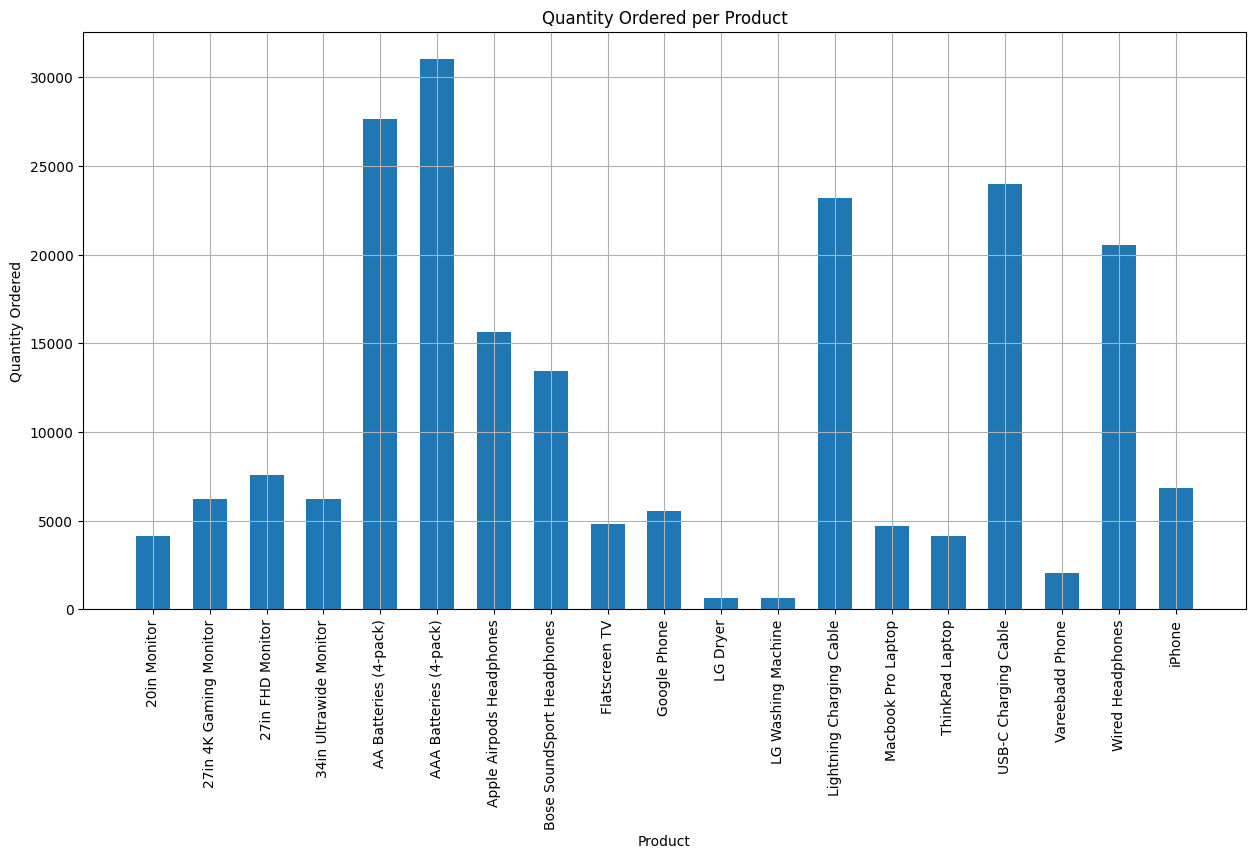

In [87]:
plt.figure(figsize=(15, 7.5))
plt.bar(Q5["Product"], Q5["Quantity Ordered"],width=0.6)
plt.grid()
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered per Product')
plt.xticks(rotation ='vertical')
plt.show()

AAA Batteries (4-pack) is the most sold product

#### Q5.2 Why is it the most sold product

C:\Users\User\AppData\Local\Temp\ipykernel_19220\655265224.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Q5["Product"],rotation ='vertical')


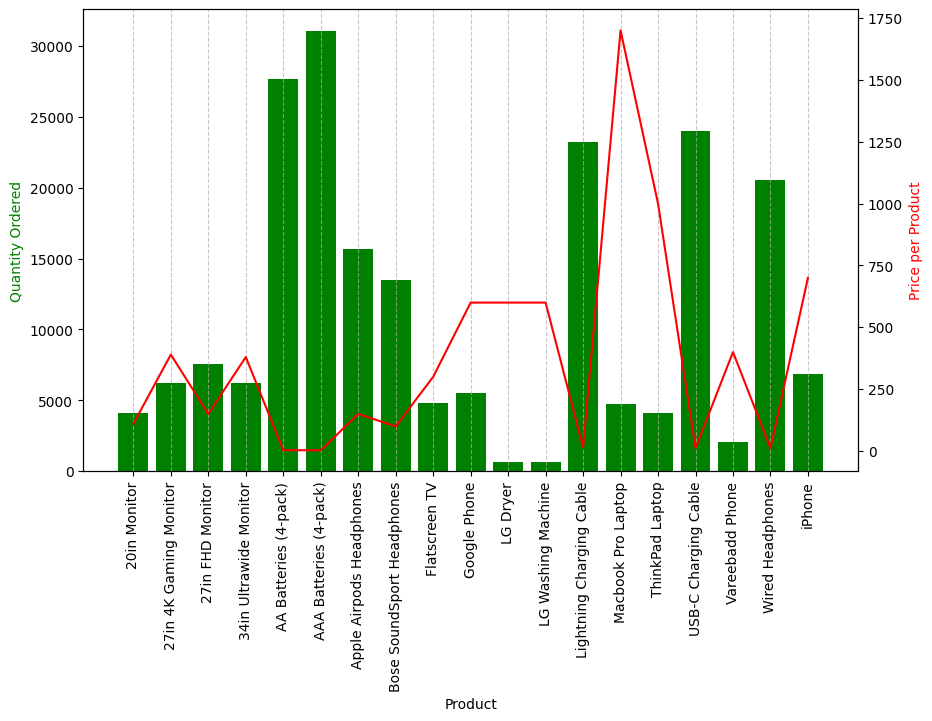

In [88]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

ax1.bar(Q5["Product"], Q5["Quantity Ordered"], color ='green')
ax2.plot(Q5["Product"], Q5["Price Each"], color = 'red')

ax1.set_xticklabels(Q5["Product"],rotation ='vertical')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color ='green')
ax2.set_ylabel('Price per Product', color ='red')

ax1.grid(True, linestyle='--', alpha=0.7, which='major', axis='x')

The high sales volume of the AAA Batteries (4-pack) can be attributed to its affordability.